In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('../data/all_data.csv')

#### General information

In [55]:
#all column names starting with 'adres_recentste_wijk'
district_column_names = np.array([s for s in list(data.columns.values) if s.startswith('adres_recentste_wijk_')])

#full name of districts, order of districts is the same as district_column_names
district_full_names = np.array(['Charlois', 'Delfshaven', 'Feijenoord', 'Ijsselmonde', 'Kralingen-Crooswijk',
                       'Noord', 'Other', 'Prins Alexander', 'Stadscentrum'])

district_name_mapping = dict(zip(district_column_names, district_full_names))

#dataframe with only 'adres_recentste_wijk' info as columns
data_districts_only = data.filter(like='adres_recentste_wijk', axis=1)

#https://allecijfers.nl/gemeente-overzicht/rotterdam/ (2024)
inhabitants_per_district = {
    'Charlois': 70525,
    'Delfshaven': 77250,
    'Feijenoord': 79440,
    'Ijsselmonde': 62670,
    'Kralingen-Crooswijk': 56010,
    'Noord': 52795,
    'Other': 131855,
    'Prins Alexander': 97430,
    'Stadscentrum': 42565,
}

print(f'Total amount of rows: \t\t\t {data_districts_only.shape[0]}')
print(f'Amount of rows not assigned a district:  {(data_districts_only.sum(axis=1) == 0).sum()}')

Total amount of rows: 			 130000
Amount of rows not assigned a district:  37752


#### Data distribution over districts

In [79]:
# count number of fraud checks for each district and in total
data_district_counts = data_districts_only.sum(axis=0)
data_total_count = data_district_counts.sum(axis=0)

data_district_percentages = (data_district_counts / data_total_count) * 100.0
print(data_district_percentages)

adres_recentste_wijk_charlois       15.018212
adres_recentste_wijk_delfshaven     19.210173
adres_recentste_wijk_feijenoord     24.412453
adres_recentste_wijk_ijsselmonde     5.956769
adres_recentste_wijk_kralingen_c     6.246206
adres_recentste_wijk_noord           2.962666
adres_recentste_wijk_other          18.847021
adres_recentste_wijk_prins_alexa     5.514483
adres_recentste_wijk_stadscentru     1.832018
dtype: float64


#### Inhabitant distribution over districts

In [ ]:
# Distribution on inhabitants per district
inhabitants_array = np.array([inhabitants_per_district[district] for district in district_full_names])
inhabitants_district_percentages = (inhabitants_array / np.sum(inhabitants_array)) * 100.0

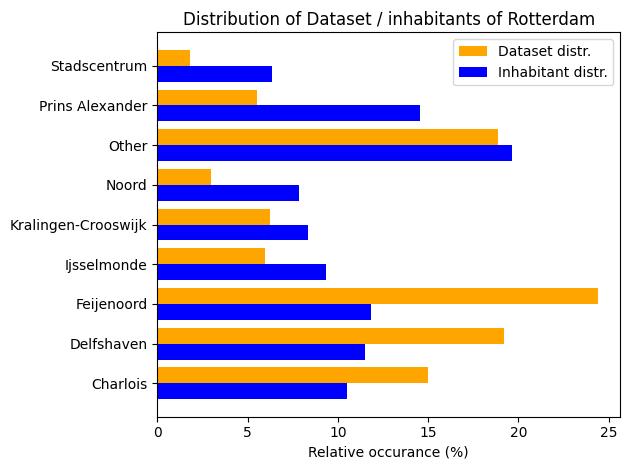

In [86]:
y_pos = np.arange(len(district_full_names))

plt.barh(y_pos, data_district_percentages, height=0.4, label='Dataset distr.', color='orange')

# Plot the second horizontal bar plot, slightly offset vertically
plt.barh(y_pos - 0.4, inhabitants_district_percentages, height=0.4, label='Inhabitant distr.', color='blue')

plt.yticks(y_pos - 0.2, district_full_names)  # Center labels between the two bars
plt.xlabel('Relative occurance (%)')
plt.title('Distribution of Dataset / inhabitants of Rotterdam')

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



In [68]:
#current distribution of fraud checks per district
current_distribution = dict(zip(district_full_names, data_district_percentages))

#target distribution of inhabitants per district
target_distribution = dict(zip(district_full_names, inhabitants_district_percentages))

#calculated weights for each district
weights_per_district = {district: target_distribution[district] / current_distribution[district] for district in district_full_names}
weights_per_district['no district'] = 1.0

#map column names to actual names while leaving 'no district' the same
district_name_per_row = data_districts_only.idxmax(axis=1).where(data.sum(axis=1) > 0, 'no district').apply(lambda x: district_name_mapping.get(x, x))
weights_per_row = district_name_per_row.map(weights_per_district)
print(weights_per_row)

0         0.485292
1         2.657574
2         1.043348
3         0.485292
4         0.485292
            ...   
129995    0.700326
129996    0.700326
129997    0.599712
129998    0.485292
129999    0.700326
Length: 130000, dtype: float64


In [70]:
weights_per_row.to_csv('../weights/district_weights_per_row.csv', index=False, header=False)